# Data Analytics with Python Course - Final Assessment
## Data Collection and Cleaning
submitted by: Ramon (Monch) Mercader

submitted to: Ramon Perez / Coder Academy - ramon.perez@coderacademy.edu.au

Notebook 1 of 2

Please use README.md file for project background and context for this file.

### Dataset

About the Dataset

How was it collected?

Reference links

Credit to person who created the scraping script

How the data is organized
Possible issues with the datasets
     - How to clean the data later



In [2]:
#Imported libraries
import os
import glob
import requests
import numpy as np
import pandas as pd
import json
import datetime
from collections import Counter
print("all items imported")

all items imported


In [3]:
#Housekeeping, check your current working directory and make sure you are inside Final_Assessment (or the main directory with datasets folder)
os.getcwd()

'C:\\Users\\monch.mercader\\Python\\Data_Analytics\\Module 1\\Final_Assessment'

In [26]:
#Collect all AU data and concatenate into AU dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_AU_files = glob.glob(os.path.join(path, "????????_AU_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_AU_file = (pd.read_csv(f) for f in all_AU_files)
Total_AU_df   = pd.concat(df_from_each_AU_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [27]:
Total_AU_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           600 non-null    object
 1   title              600 non-null    object
 2   publishedAt        600 non-null    object
 3   channelId          600 non-null    object
 4   channelTitle       600 non-null    object
 5   categoryId         600 non-null    int64 
 6   trending_date      600 non-null    object
 7   tags               600 non-null    object
 8   view_count         600 non-null    int64 
 9   likes              600 non-null    int64 
 10  dislikes           600 non-null    int64 
 11  comment_count      600 non-null    int64 
 12  thumbnail_link     600 non-null    object
 13  comments_disabled  600 non-null    bool  
 14  ratings_disabled   600 non-null    bool  
 15  description        600 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

In [53]:
Total_AU_df.head(3)

video_id                                          title  \
0  aCIMYjqWxwA          Australian Lamb: Make Lamb, Not Walls   
1  snrPqH84tuc  I WAS ALL ALONE ON MY BIRTHDAY! (THEY FORGOT)   
2  sJn8dG9iSaw          Among Us Logic 13 | Cartoon Animation   

            publishedAt                 channelId     channelTitle  \
0  2021-01-10T18:59:21Z  UC72mdTdZGMpLNG5kRfFVvaw  Australian Lamb   
1  2021-01-09T22:36:42Z  UC56D-IHcUvLVFTX_8NpQMXg     Brent Rivera   
2  2021-01-10T00:00:08Z  UCToxKVrkEuAONR4rFIJ_DyQ        GameToons   

   categoryId trending_date  \
0          26      21.11.01   
1          24      21.11.01   
2           1      21.11.01   

                                                tags  view_count   likes  \
0                                             [none]      132281    2339   
1                                             [none]     3323919  226939   
2  among us|among us logic|animation|funny animat...     2494114   94922   

   dislikes  comment_count                                  thumbnail_link  \
0       114              0  https://i.ytimg.com/vi/aCIMYjqWxwA/default.jpg   
1      2788          41783  https://i.ytimg.com/vi/snrPqH84tuc/default.jpg   
2      2277          12744  https://i.ytimg.com/vi/sJn8dG9iSaw/default.jpg   

   comments_disabled  ratings_disabled  \
0               True             False   
1              False             False   
2              False             False   

                                         description  
0  Australia 2031. Our once united nation has bee...  
1  LIKE THIS VIDEO TO WISH ME A HAPPY BIRTHDAY :)...  
2  They are AMONG US skin pack ‚û°Ô∏è https://cutt.ly...

In [30]:
#Collect all PH data and concatenate into PH dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_PH_files = glob.glob(os.path.join(path, "????????_PH_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_PH_file = (pd.read_csv(f) for f in all_PH_files)
Total_PH_df   = pd.concat(df_from_each_PH_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [31]:
Total_PH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           455 non-null    object
 1   title              455 non-null    object
 2   publishedAt        455 non-null    object
 3   channelId          455 non-null    object
 4   channelTitle       455 non-null    object
 5   categoryId         455 non-null    int64 
 6   trending_date      455 non-null    object
 7   tags               455 non-null    object
 8   view_count         455 non-null    int64 
 9   likes              455 non-null    int64 
 10  dislikes           455 non-null    int64 
 11  comment_count      455 non-null    int64 
 12  thumbnail_link     455 non-null    object
 13  comments_disabled  455 non-null    bool  
 14  ratings_disabled   455 non-null    bool  
 15  description        452 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

In [32]:
Total_PH_df.head(3)

video_id                                              title  \
0  rECI7yHmr84  SAPUL SA CCTV: Ang mga huling oras ni Christin...   
1  tbIubPbvzhs  REVELATION! ITO PALA ANG BUONG PAGKATAO NI CHR...   
2  1EfauAJ4GXU  Suspek sa Christine Dacera case lumantad; kamp...   

            publishedAt                 channelId         channelTitle  \
0  2021-01-07T11:21:36Z  UCE2606prvXQc_noEqKxVJXA         ABS-CBN News   
1  2021-01-06T10:06:52Z  UCS8b_WaLf3RgzbAZOv_Leog  Showbiz Philippines   
2  2021-01-05T11:35:12Z  UCE2606prvXQc_noEqKxVJXA         ABS-CBN News   

   categoryId trending_date  \
0          25      21.11.01   
1          24      21.11.01   
2          25      21.11.01   

                                                tags  view_count  likes  \
0  PatrolPh|Tagalog news|balita|TV PATROL|TV PATR...     9431515  53539   
1  Showbiz Philippines|showbiz philippines|Pinoy ...     5226670  43729   
2  PatrolPH|Tagalog News|balita|TV Patrol|TV PATR...     7675114  60802   

   dislikes  comment_count                                  thumbnail_link  \
0      3512           9352  https://i.ytimg.com/vi/rECI7yHmr84/default.jpg   
1      3572           3851  https://i.ytimg.com/vi/tbIubPbvzhs/default.jpg   
2      5382          10449  https://i.ytimg.com/vi/1EfauAJ4GXU/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   

                                         description  
0  Sa isang CCTV footage, makikita ang flight att...  
1  LATEST! REVELATION! ITO PALA ANG BUONG PAGKATA...  
2  Umapela ang kampo ng nasawing flight attendant...

In [37]:
#Collect all NZ data and concatenate into NZ dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_NZ_files = glob.glob(os.path.join(path, "????????_NZ_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_NZ_file = (pd.read_csv(f) for f in all_NZ_files)
Total_NZ_df   = pd.concat(df_from_each_NZ_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [38]:
Total_NZ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           530 non-null    object
 1   title              530 non-null    object
 2   publishedAt        530 non-null    object
 3   channelId          530 non-null    object
 4   channelTitle       530 non-null    object
 5   categoryId         530 non-null    int64 
 6   trending_date      530 non-null    object
 7   tags               530 non-null    object
 8   view_count         530 non-null    int64 
 9   likes              530 non-null    int64 
 10  dislikes           530 non-null    int64 
 11  comment_count      530 non-null    int64 
 12  thumbnail_link     530 non-null    object
 13  comments_disabled  530 non-null    bool  
 14  ratings_disabled   530 non-null    bool  
 15  description        530 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

In [39]:
Total_NZ_df.head(3)

video_id                                              title  \
0  lhjRXO72v1s  Must-See New Video Shows Capitol Riot Was Way ...   
1  JpUxQyLCBbk  Hey, Republicans Who Supported This President:...   
2  fF53U7TVCxg  COOLEST HACKS TO BECOME POPULAR AT SCHOOL || E...   

            publishedAt                 channelId  \
0  2021-01-09T02:37:11Z  UCaXkIU1QidjPwiAYu6GcHjg   
1  2021-01-07T06:29:13Z  UCMtFAi84ehTSYSE9XoHefig   
2  2021-01-02T14:00:07Z  UCBXNpF6k2n8dsI6nBH8q4sQ   

                         channelTitle  categoryId trending_date  \
0                               MSNBC          25      21.11.01   
1  The Late Show with Stephen Colbert          24      21.11.01   
2                             123 GO!          26      21.11.01   

                                                tags  view_count   likes  \
0  Republicans|Capitol Hill|White House|Mike Penc...     7691188  136030   
1  The Late Show|Late Show|Stephen Colbert|Steven...     9790784  279227   
2                                             #123go     9609972   80295   

   dislikes  comment_count                                  thumbnail_link  \
0     14534          55143  https://i.ytimg.com/vi/lhjRXO72v1s/default.jpg   
1     14588          40790  https://i.ytimg.com/vi/JpUxQyLCBbk/default.jpg   
2     11126           4983  https://i.ytimg.com/vi/fF53U7TVCxg/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   

                                         description  
0  Chris Hayes: ‚ÄúIt is entirely possible that the...  
1  After the unprecedented assault on democracy t...  
2  Would you ride a motorcycle to be popular? Let...

In [40]:
#Collect all US data and concatenate into US dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_US_files = glob.glob(os.path.join(path, "????????_US_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_US_file = (pd.read_csv(f) for f in all_US_files)
Total_US_df = pd.concat(df_from_each_US_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [41]:
Total_US_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           600 non-null    object
 1   title              600 non-null    object
 2   publishedAt        600 non-null    object
 3   channelId          600 non-null    object
 4   channelTitle       600 non-null    object
 5   categoryId         600 non-null    int64 
 6   trending_date      600 non-null    object
 7   tags               600 non-null    object
 8   view_count         600 non-null    int64 
 9   likes              600 non-null    int64 
 10  dislikes           600 non-null    int64 
 11  comment_count      600 non-null    int64 
 12  thumbnail_link     600 non-null    object
 13  comments_disabled  600 non-null    bool  
 14  ratings_disabled   600 non-null    bool  
 15  description        597 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

In [42]:
Total_US_df.head(3)

video_id                                              title  \
0  f8oy13PjR-Y                           FINDING OUT I'M PREGNANT   
1  72z7sr2ZLJs  Former Homeland Security head's advice followi...   
2  sJn8dG9iSaw              Among Us Logic 13 | Cartoon Animation   

            publishedAt                 channelId        channelTitle  \
0  2021-01-09T22:36:09Z  UC0psAD-M4X6O0yC_hFRK4hw        AlondraDessy   
1  2021-01-10T14:25:00Z  UCVT1tPkR-fUVlO652EcO3ow  CBS Sunday Morning   
2  2021-01-10T00:00:08Z  UCToxKVrkEuAONR4rFIJ_DyQ           GameToons   

   categoryId trending_date  \
0          22      21.11.01   
1          25      21.11.01   
2           1      21.11.01   

                                                tags  view_count   likes  \
0  alondradessy|alo and benny|alondra and benny|t...     1996918  202340   
1  CBS Sunday Morning|CBS News|news|former homela...      654186    9090   
2  among us|among us logic|animation|funny animat...     2494114   94923   

   dislikes  comment_count                                  thumbnail_link  \
0      2761          19488  https://i.ytimg.com/vi/f8oy13PjR-Y/default.jpg   
1      1610           4320  https://i.ytimg.com/vi/72z7sr2ZLJs/default.jpg   
2      2277          12744  https://i.ytimg.com/vi/sJn8dG9iSaw/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   

                                         description  
0  OMG OMG HI!! This has been a secret that I've ...  
1  Former Homeland Security Secretary Michael Che...  
2  They are AMONG US skin pack ‚û°Ô∏è https://cutt.ly...

In [43]:
#Collect all SG data and concatenate into SG dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_SG_files = glob.glob(os.path.join(path, "????????_SG_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_SG_file = (pd.read_csv(f) for f in all_SG_files)
Total_SG_df = pd.concat(df_from_each_SG_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [44]:
Total_SG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           536 non-null    object
 1   title              536 non-null    object
 2   publishedAt        536 non-null    object
 3   channelId          536 non-null    object
 4   channelTitle       536 non-null    object
 5   categoryId         536 non-null    int64 
 6   trending_date      536 non-null    object
 7   tags               536 non-null    object
 8   view_count         536 non-null    int64 
 9   likes              536 non-null    int64 
 10  dislikes           536 non-null    int64 
 11  comment_count      536 non-null    int64 
 12  thumbnail_link     536 non-null    object
 13  comments_disabled  536 non-null    bool  
 14  ratings_disabled   536 non-null    bool  
 15  description        536 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

In [48]:
Total_SG_df.tail(4)

video_id                                              title  \
532  1Bbte4PoOhw  Aleka Official Trailer | Aari Arujunan | Aishw...   
533  FvXhhxNVxOk  2021Âåó‰∫¨Âç´ËßÜË∑®Âπ¥|Âë®Ê∑±‰∏ÄÈ¶ñ„ÄäËçíÂüéÊ∏°„ÄãÊÉäËâ≥ÂÖ®Âú∫ÔºåËÆ©‰∫∫ÊÑüÂèóÂà∞Á©∫ÁÅµÁöÑÊÑèÂ¢ÉÔºå‰∏çÊÑßÊòØÊµ∑Â¶ñÂóìÈü≥„ÄêÂåó‰∫¨...   
534  ynx9524xLgs                  Rasigar Paavangal | Parithabangal   
535  6eR5nSTeOa0  More Republicans Finally Turn On Trump After D...   

              publishedAt                 channelId  \
532  2021-01-01T12:29:45Z  UCJfjtFce-lTsVBBGHmv_r2Q   
533  2020-12-31T14:22:35Z  UC4gENL0K5J_gTODGW0dN3fQ   
534  2020-12-31T11:45:09Z  UCueYcgdqos0_PzNOq81zAFg   
535  2021-01-09T06:20:45Z  UCaXkIU1QidjPwiAYu6GcHjg   

                                  channelTitle  categoryId trending_date  \
532                                  Backstage           1      21.14.01   
533  Âåó‰∫¨Âç´ËßÜÂÆòÊñπÈ¢ëÈÅì China BeijingTV Official Channel          22      21.14.01   
534                              Parithabangal          23      21.14.01   
535                                      MSNBC          25      21.14.01   

                                                  tags  view_count   likes  \
532                   Aleka|Aari|Aari Arujunan|Trailer     1827412  118224   
533  Âåó‰∫¨Âç´ËßÜBTV|Âåó‰∫¨Âç´ËßÜÊò•ÊôöBTV|Âåó‰∫¨Âç´ËßÜË∑®Âπ¥Êôö‰ºöBTV|Âåó‰∫¨Âç´ËßÜÂÖÉÂÆµÊôö‰ºöBTV|Ë∑®ÁïåÊ≠åÁéã...      313237    5499   
534  Rasigar Paavangal|Parithabangal|rajini politic...     1971250  152723   
535  Republicans|Democrats|Capitol Hill|Congress|Na...     2321794   38639   

     dislikes  comment_count                                  thumbnail_link  \
532      2988           5794  https://i.ytimg.com/vi/1Bbte4PoOhw/default.jpg   
533       122            457  https://i.ytimg.com/vi/FvXhhxNVxOk/default.jpg   
534      3660           8967  https://i.ytimg.com/vi/ynx9524xLgs/default.jpg   
535      1365          10599  https://i.ytimg.com/vi/6eR5nSTeOa0/default.jpg   

     comments_disabled  ratings_disabled  \
532              False             False   
533              False             False   
534              False             False   
535              False             False   

                                           description  
532  DOP : K.DhillrajMusic : C.SathyaBackground Sco...  
533  ‚ñ∫ËäÇÁõÆ‰ªãÁªçÔºö#Âåó‰∫¨Âç´ËßÜ #2021Âåó‰∫¨Âç´ËßÜË∑®Âπ¥Êôö‰ºö ‰ª•Â§©Âú∞‰∏∫ÊôØÔºå‰ª•ÂÜ∞Èõ™‰∏∫ÁîªÔºåÁî®ÊûÅÂÖ∑ÊøÄÊÉÖÁöÑÈü≥‰πê...  
534  Parithabangal are presenting a New video Rasig...  
535  Trump has lost his Twitter account and more Re...

In [49]:
#Collect all GB data and concatenate into GB dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_GB_files = glob.glob(os.path.join(path, "????????_GB_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_GB_file = (pd.read_csv(f) for f in all_GB_files)
Total_GB_df = pd.concat(df_from_each_GB_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [50]:
Total_GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           600 non-null    object
 1   title              600 non-null    object
 2   publishedAt        600 non-null    object
 3   channelId          600 non-null    object
 4   channelTitle       600 non-null    object
 5   categoryId         600 non-null    int64 
 6   trending_date      600 non-null    object
 7   tags               600 non-null    object
 8   view_count         600 non-null    int64 
 9   likes              600 non-null    int64 
 10  dislikes           600 non-null    int64 
 11  comment_count      600 non-null    int64 
 12  thumbnail_link     600 non-null    object
 13  comments_disabled  600 non-null    bool  
 14  ratings_disabled   600 non-null    bool  
 15  description        594 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

In [51]:
Total_GB_df.head(3)

video_id                                              title  \
0  lTBz1Fx7DVw  Last To Get Knocked Out Wins iPhone 12 ft Beta...   
1  V8JW7sry17U  In The Tunnel at MAN UTD & Rashford Match Shir...   
2  5Fg9oZk-5uA                    I Bought Everything In 5 Stores   

            publishedAt                 channelId  \
0  2021-01-10T18:25:32Z  UC_8JxHQrJHC4rUsBtoPY4wQ   
1  2021-01-10T18:00:17Z  UCi33DX7KG3M3bI0ipjOP2Eg   
2  2021-01-09T21:01:25Z  UCX6OQ3DkcsbYNE6H8uQQuVA   

                  channelTitle  categoryId trending_date  \
0                  KingKennyTv          24      21.11.01   
1  Ben Foster - The Cycling GK          17      21.11.01   
2                      MrBeast          24      21.11.01   

                                                tags  view_count    likes  \
0  Last To Get Knocked Out Wins iPhone 12 ft Beta...      274892    37159   
1  Ben Foster|The Cycling GK|Old Trafford|Man UTD...      353059    27490   
2                                             [none]    22835114  2246620   

   dislikes  comment_count                                  thumbnail_link  \
0       257           2025  https://i.ytimg.com/vi/lTBz1Fx7DVw/default.jpg   
1        72           4224  https://i.ytimg.com/vi/V8JW7sry17U/default.jpg   
2     13415         147771  https://i.ytimg.com/vi/5Fg9oZk-5uA/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   

                                         description  
0  Last To Get Knocked Out Wins iPhone 12 ft @Bet...  
1  Want to win Marcus Rashford's match shirt from...  
2  Please subscribe this video costed so much mon...

In [98]:
Total_AU_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           600 non-null    object
 1   title              600 non-null    object
 2   publishedAt        600 non-null    object
 3   channelId          600 non-null    object
 4   channelTitle       600 non-null    object
 5   categoryId         600 non-null    int64 
 6   trending_date      600 non-null    object
 7   tags               600 non-null    object
 8   view_count         600 non-null    int64 
 9   likes              600 non-null    int64 
 10  dislikes           600 non-null    int64 
 11  comment_count      600 non-null    int64 
 12  thumbnail_link     600 non-null    object
 13  comments_disabled  600 non-null    bool  
 14  ratings_disabled   600 non-null    bool  
 15  description        600 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

In [92]:
Total_AU_df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [82]:
#Filter categories to the most relevant, categoryId: 19 - Travel & Events, 21 - Video blogging, 22 - People & Blogs, 26 - How To & Style, 37 Family)

Total_AU_df_filtered = Total_AU_df.drop(Total_AU_df[(Total_AU_df['categoryId'] != 19) & (Total_AU_df['categoryId'] != 21) 
                                                    & (Total_AU_df['categoryId'] != 22) & (Total_AU_df['categoryId'] != 26) 
                                                    & (Total_AU_df['categoryId'] != 37)].index) 

In [101]:
Total_AU_df_filtered.tail(10)

video_id                                              title  \
513  Yx-FgJ-PqaA  Revealing the secret I've kept for 3 years...I...   
537  qzFXj3YW01A                             My Among Us Birthday üôÑ   
539  rJ-FEfXzKIY  STEPHEN TRIES vs CALFREEZY | Park The Bus Epis...   
540  aTLPHmrr-cM                     Something we want to tell you!   
554  hKUOkiKHD8U  Elon Musk Most Shocking 2021 Predictions - And...   
555  aE_zvyuAcuo       If Everything Was Like Among Us *Bloopers 2*   
570  SAjP9HCqk4I                               Deadpool 2 Monologue   
581  JMgHZ5XHA_4              He Bet $20,000 On A Coinflip, And Won   
586  bIiLofAhTz8    ALLERGIC REACTION after SAYING YES to the dress   
593  ZSIp00SewO8  Day 1 - Invite  |  BREATH - A 30 Day Yoga Journey   

              publishedAt                 channelId          channelTitle  \
513  2021-01-11T00:00:11Z  UCAHufvd02viJSRdt3ojdPOg            Sarahs Day   
537  2021-01-01T18:39:24Z  UCECfNdmd7m2FnmfvWeFoGpg         BriannaShorts   
539  2021-01-07T16:00:01Z  UCIgl4k5noP5bHyqFqSccy_Q                   UMM   
540  2021-01-04T18:43:10Z  UCHUE4ypXKp7ZkmdWbGJNgJg           AmazingPhil   
554  2020-12-29T21:25:52Z  UC_0fFiRC70exikffwgm2Uog  Roger James Hamilton   
555  2021-01-01T22:15:10Z  UCn3AViOfcFN4zIICMC5hvPg         Shiloh & Bros   
570  2021-01-04T22:15:37Z  UCA3-nIYWu4PTWkb6NwhEpzg         Ryan Reynolds   
581  2021-01-07T21:11:13Z  UC4-79UOlP48-QNGgCko5p2g        MrBeast Shorts   
586  2021-01-05T01:13:39Z  UCLGe0PxyRFWmXVGJKq_gGvw    fancy vlogs by gab   
593  2021-01-02T06:00:03Z  UCFKE7WVJfvaHW5q283SxchA     Yoga With Adriene   

     categoryId trending_date  \
513          22      21.14.01   
537          22      21.14.01   
539          22      21.14.01   
540          22      21.14.01   
554          26      21.14.01   
555          22      21.14.01   
570          22      21.14.01   
581          22      21.14.01   
586          22      21.14.01   
593          26      21.14.01   

                                                  tags  view_count   likes  \
513  sunee|Sarahs day|healthy cooking|healthy recip...      254058   16278   
537  brianna|briannashorts|brianna shorts|briannapl...     2180071   60841   
539  umm|umm football|umm channel|harry pinero|harr...      268167   12015   
540  dan and phil|dan and phil 2021|life update|lif...     2217508  208637   
554  roger j hamilton|roger hamilton|entrepreneur t...     1296403   24924   
555  among us|among us in real life|among us impost...     4817802   77199   
570                                             [none]     1541834   95553   
581                                             [none]     2743697  137413   
586  Allergic reaction after saying yes to the dres...      729578   30034   
593  breath|30 day yoga journey|30 days of yoga|yog...     2439149   66479   

     dislikes  comment_count                                  thumbnail_link  \
513       361           1934  https://i.ytimg.com/vi/Yx-FgJ-PqaA/default.jpg   
537      2462           1929  https://i.ytimg.com/vi/qzFXj3YW01A/default.jpg   
539       110            275  https://i.ytimg.com/vi/rJ-FEfXzKIY/default.jpg   
540      1359          16287  https://i.ytimg.com/vi/aTLPHmrr-cM/default.jpg   
554       951           4488  https://i.ytimg.com/vi/hKUOkiKHD8U/default.jpg   
555      2374           8218  https://i.ytimg.com/vi/aE_zvyuAcuo/default.jpg   
570       773           3105  https://i.ytimg.com/vi/SAjP9HCqk4I/default.jpg   
581      1491           6897  https://i.ytimg.com/vi/JMgHZ5XHA_4/default.jpg   
586      1668           2523  https://i.ytimg.com/vi/bIiLofAhTz8/default.jpg   
593       916           9222  https://i.ytimg.com/vi/ZSIp00SewO8/default.jpg   

     comments_disabled  ratings_disabled  \
513              False             False   
537              False             False   
539              False             False   
540              False             False   
554              False             False   
555    

In [107]:
Total_AU_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 593
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           80 non-null     object
 1   title              80 non-null     object
 2   publishedAt        80 non-null     object
 3   channelId          80 non-null     object
 4   channelTitle       80 non-null     object
 5   categoryId         80 non-null     int64 
 6   trending_date      80 non-null     object
 7   tags               80 non-null     object
 8   view_count         80 non-null     int64 
 9   likes              80 non-null     int64 
 10  dislikes           80 non-null     int64 
 11  comment_count      80 non-null     int64 
 12  thumbnail_link     80 non-null     object
 13  comments_disabled  80 non-null     bool  
 14  ratings_disabled   80 non-null     bool  
 15  description        80 non-null     object
dtypes: bool(2), int64(5), object(9)
memory usage:

In [108]:
#Since the raw CSV scrapes are collected daily, videos may be popular over a period of time. Therefore, it is necessary to filter out the duplicates, and retain the most recent occurance of the video_id.
#This can be done by first finding out how many duplicates a video_id has. 
#The lines below uses the video_id column to pivot and counts the number of instances it appears in the dataframe

dup_df = pd.DataFrame(Total_AU_df_filtered, columns= ['video_id'])

duplicates_df = dup_df.pivot_table(index=['video_id'], aggfunc='size')
print (duplicates_df)

video_id
2Al7H9AiN1A    1
48NAQCSnHdQ    1
4_Vp3FhrzTk    1
4eSkcCuliJE    3
7WteIGHPStg    3
9iEBLoX2BxI    2
AYCgAZc5mck    3
B6bJ_vTslyo    3
Dan4aEicr-g    2
FnYI8chEJ_w    1
HZ-bqnA5ioQ    3
JMgHZ5XHA_4    3
RIjSZxqlPpA    2
S6aXAwYT6nY    1
SAjP9HCqk4I    3
Yx-FgJ-PqaA    2
ZSIp00SewO8    3
_xJUCsyMQes    3
aCIMYjqWxwA    3
aE_zvyuAcuo    3
aTLPHmrr-cM    3
bIiLofAhTz8    3
e4wajXk_cDs    3
f8oy13PjR-Y    3
hKUOkiKHD8U    3
lS4Tit7taes    2
m4rAQlCfJsw    2
oKVgdxUPHWQ    2
p19cjKg8dIc    1
qgaTjrH5_yo    2
qzFXj3YW01A    3
rJ-FEfXzKIY    3
z4FnDEYg2yw    2
zBZ4skqOm04    2
dtype: int64


In [115]:
#This is to check that the drop_duplicates action in the next cells keep the correct entry (highest video)
Total_AU_df_filtered.loc[Total_AU_df_filtered['video_id'] == '4eSkcCuliJE']


video_id                    title           publishedAt  \
77   4eSkcCuliJE  When you suck at gaming  2021-01-05T04:50:40Z   
314  4eSkcCuliJE  When you suck at gaming  2021-01-05T04:50:40Z   
511  4eSkcCuliJE  When you suck at gaming  2021-01-05T04:50:40Z   

                    channelId  channelTitle  categoryId trending_date    tags  \
77   UCJf7YEdkEV33UXnm0gLzwvA  Jimi Jackson          22      21.11.01  [none]   
314  UCJf7YEdkEV33UXnm0gLzwvA  Jimi Jackson          22      21.13.01  [none]   
511  UCJf7YEdkEV33UXnm0gLzwvA  Jimi Jackson          22      21.14.01  [none]   

     view_count  likes  dislikes  comment_count  \
77       290786  17950       143           1233   
314      328212  18938       157           1265   
511      335269  19126       157           1269   

                                     thumbnail_link  comments_disabled  \
77   https://i.ytimg.com/vi/4eSkcCuliJE/default.jpg              False   
314  https://i.ytimg.com/vi/4eSkcCuliJE/default.jpg              False   
511  https://i.ytimg.com/vi/4eSkcCuliJE/default.jpg              False   

     ratings_disabled                                        description  
77              False  Thanks to Konic for sponsoring this video! Che...  
314             False  Thanks to Konic for sponsoring this video! Che...  
511             False  Thanks to Konic for sponsoring this video! Che...

In [102]:
#This uses the drop method to remove the duplicates under the video_id column, and to keep the last instance. 
new_df = Total_AU_df_filtered.drop_duplicates(subset=['video_id'], keep='last')

In [103]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 162 to 593
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           34 non-null     object
 1   title              34 non-null     object
 2   publishedAt        34 non-null     object
 3   channelId          34 non-null     object
 4   channelTitle       34 non-null     object
 5   categoryId         34 non-null     int64 
 6   trending_date      34 non-null     object
 7   tags               34 non-null     object
 8   view_count         34 non-null     int64 
 9   likes              34 non-null     int64 
 10  dislikes           34 non-null     int64 
 11  comment_count      34 non-null     int64 
 12  thumbnail_link     34 non-null     object
 13  comments_disabled  34 non-null     bool  
 14  ratings_disabled   34 non-null     bool  
 15  description        34 non-null     object
dtypes: bool(2), int64(5), object(9)
memory usag

In [117]:
new_df.head(3)

video_id                                              title  \
162  S6aXAwYT6nY  MY LAST PREGNANCY UPDATE ON THE TWINS | OUR UL...   
171  4_Vp3FhrzTk                          EATING MASSIVE SEA URCHIN   
172  2Al7H9AiN1A  Positive 2021 Goals! 12 Unique Ab Exercises & ...   

              publishedAt                 channelId     channelTitle  \
162  2021-01-04T20:53:06Z  UC_0mlge_fLewbr5P8YEL2tA   THE WEISS LIFE   
171  2020-12-17T03:44:22Z  UCMyOj6fhvKFMjxUCp3b_3gA  Nick DiGiovanni   
172  2020-12-31T04:41:05Z  UCAHufvd02viJSRdt3ojdPOg       Sarahs Day   

     categoryId trending_date  \
162          26      21.11.01   
171          22      21.11.01   
172          22      21.11.01   

                                                  tags  view_count  likes  \
162  pregnancy update on the twins!|unexpected news...      199889   9208   
171                                             [none]     3422355  80402   
172  new years resolution|goals|setting goals|new y...      455438  26518   

     dislikes  comment_count                                  thumbnail_link  \
162       309              0  https://i.ytimg.com/vi/S6aXAwYT6nY/default.jpg   
171      5955           3326  https://i.ytimg.com/vi/4_Vp3FhrzTk/default.jpg   
172       190           1028  https://i.ytimg.com/vi/2Al7H9AiN1A/default.jpg   

     comments_disabled  ratings_disabled  \
162               True             False   
171              False             False   
172              False             False   

                                           description  
162  Don't forget to subscribe! http://www.youtube....  
171  Uni is certainly not for everybody. It's a bla...  
172  SWEAT IT TO SHRED IT EBOOK FITNESS GUIDES!!htt...

In [118]:
#Confirmed that the process was correct, we see the latest entry

new_df.loc[new_df['video_id'] == '4eSkcCuliJE']

video_id                    title           publishedAt  \
511  4eSkcCuliJE  When you suck at gaming  2021-01-05T04:50:40Z   

                    channelId  channelTitle  categoryId trending_date    tags  \
511  UCJf7YEdkEV33UXnm0gLzwvA  Jimi Jackson          22      21.14.01  [none]   

     view_count  likes  dislikes  comment_count  \
511      335269  19126       157           1269   

                                     thumbnail_link  comments_disabled  \
511  https://i.ytimg.com/vi/4eSkcCuliJE/default.jpg              False   

     ratings_disabled                                        description  
511             False  Thanks to Konic for sponsoring this video! Che...

In [119]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 162 to 593
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           34 non-null     object
 1   title              34 non-null     object
 2   publishedAt        34 non-null     object
 3   channelId          34 non-null     object
 4   channelTitle       34 non-null     object
 5   categoryId         34 non-null     int64 
 6   trending_date      34 non-null     object
 7   tags               34 non-null     object
 8   view_count         34 non-null     int64 
 9   likes              34 non-null     int64 
 10  dislikes           34 non-null     int64 
 11  comment_count      34 non-null     int64 
 12  thumbnail_link     34 non-null     object
 13  comments_disabled  34 non-null     bool  
 14  ratings_disabled   34 non-null     bool  
 15  description        34 non-null     object
dtypes: bool(2), int64(5), object(9)
memory usag

In [120]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize'] = [6.0, 6.0] # control the width and height of all figures
plt.rcParams['figure.dpi'] = 500 # control the quality of all figures. Higher is better :)

%matplotlib inline

Text(0, 0.5, 'Total likes')

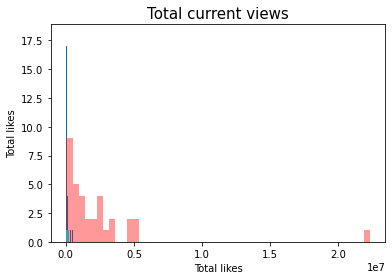

In [128]:
plt.hist(x=new_df['likes']);

plt.hist(x=new_df['view_count'], color='red', bins=50, histtype='stepfilled', alpha=0.4)
plt.hist(x=new_df['likes'], color='cyan', bins=50, histtype='stepfilled', alpha=0.5)
plt.hist(x=new_df['dislikes'], color='pink', bins=50, histtype='stepfilled', alpha=0.5)
plt.title('Total current views', fontdict={'fontsize': 15})
plt.xlabel('Total likes')
plt.ylabel('Total likes')
# plt.show()

In [ ]:
plt.hist(x=df['maxtemp'], color='red', bins=50, histtype='stepfilled', alpha=0.4)
plt.hist(x=df['mintemp'], color='cyan', bins=50, histtype='stepfilled', alpha=0.5)
plt.title('Maximum & Minimum Temperature - 2007-2017', fontdict={'fontsize': 15})
plt.xlabel('Temperature Distribution in Celcius')
plt.ylabel('Temperature Frequency in 10 Years')
# plt.show()